In [13]:
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd, sklearn
import librosa, librosa.display
import numpy as np
import pandas as pd
from sklearn import preprocessing

plt.rcParams['figure.figsize'] = (14, 5)

In [14]:
filepath = '../database/songs/ML1.mp3'
hop_length = 512
time = 30

In [15]:
x, sr = librosa.load(filepath)
middle = int(x.shape[0]/2)
lower = int(middle - sr*time/2)
upper = int(middle + sr*time/2)
x = x[lower:upper]
ipd.Audio(x, rate=sr)

In [33]:
sr #every 43ms audio sample is acquired

22050

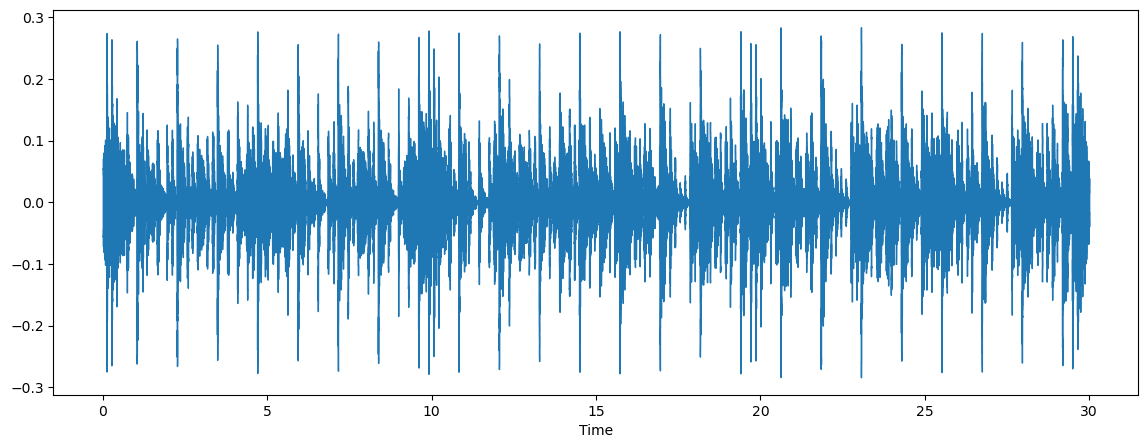

In [17]:
librosa.display.waveshow(y=x, sr=sr)

### Harmonic vs Percussive

Text(0.5, 1.0, 'Harmonic + Percussive')

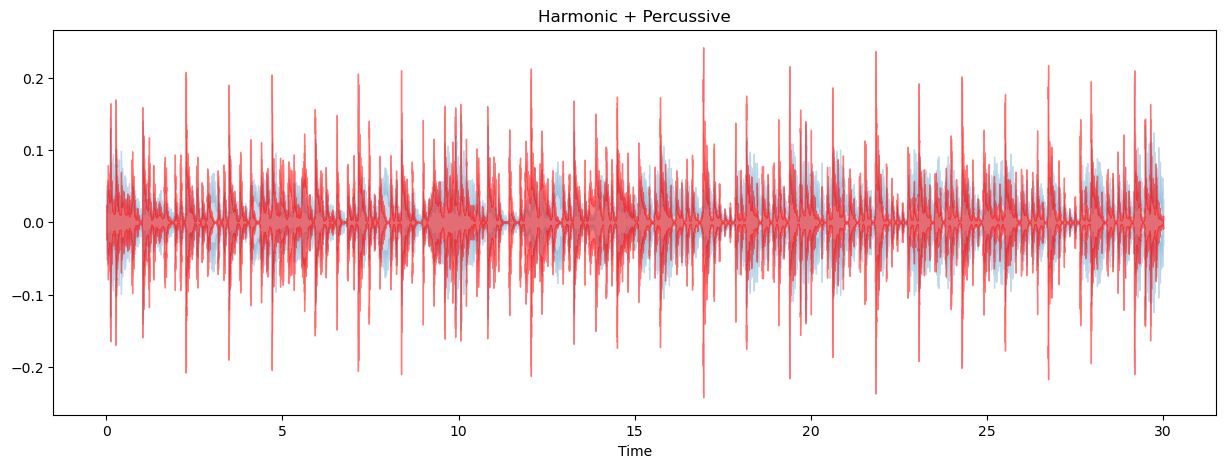

In [18]:
y_harmonic, y_percussive = librosa.effects.hpss(x)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y_harmonic, sr=sr, alpha=0.25)
librosa.display.waveshow(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')

# SPECTRAL

## 1.Extract spectral centroid

In [19]:
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr, hop_length=hop_length)[0]
spectral_centroids.shape

(1292,)

In [20]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

In [21]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

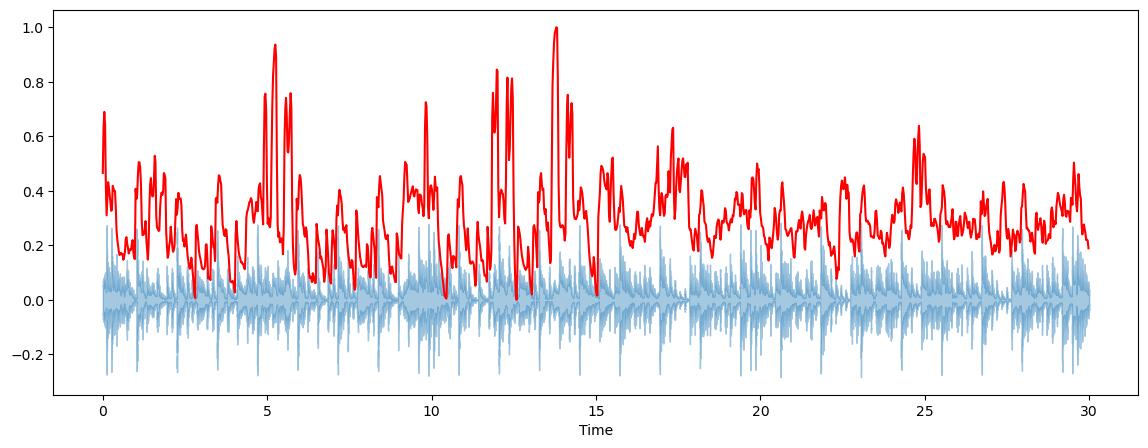

In [22]:
librosa.display.waveshow(y=x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r') # normalize for visualization purposes

In [23]:
spectral_centroids.reshape(1,spectral_centroids.shape[0]).shape

(1, 1292)

## //Extract spectral bandwidth

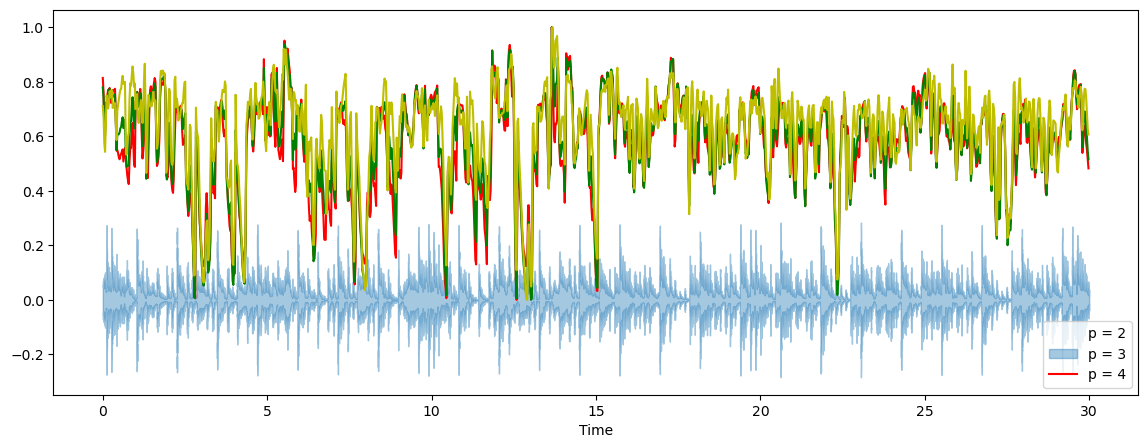

In [24]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=4)[0]
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

In [25]:
spectral_bandwidth_2.reshape(1,spectral_bandwidth_2.shape[0]).shape

(1, 1292)

## 2.Extract spectral rolloff

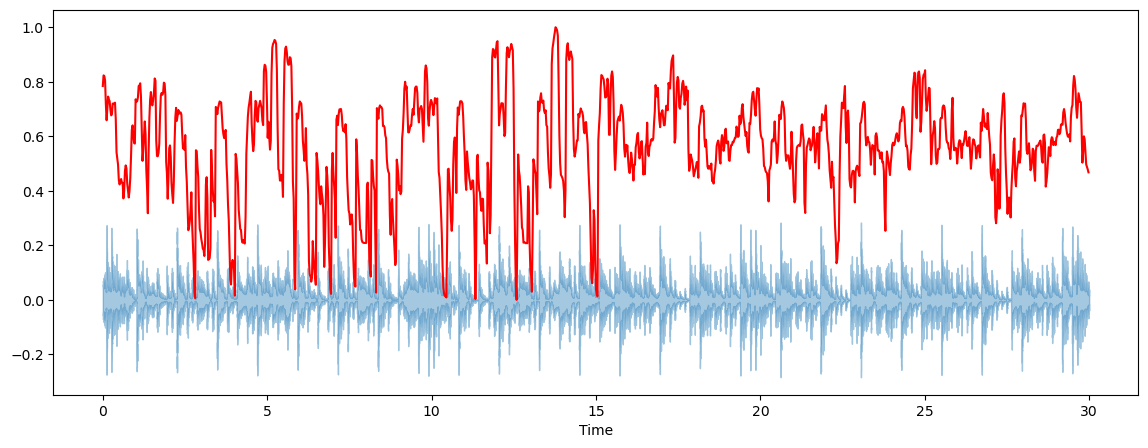

In [26]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr)[0]
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

In [27]:
spectral_rolloff.reshape(1,spectral_rolloff.shape[0]).shape

(1, 1292)

## 3.Extract spectral flux

In [28]:
odf_default = librosa.onset.onset_strength(y=x, sr=sr, hop_length=hop_length)
onset_default = librosa.onset.onset_detect(y=x, sr=sr, hop_length=hop_length,
                                           units='time')
spectral_flux = odf_default

In [29]:
frame_time = librosa.frames_to_time(np.arange(len(odf_default)),
                                    sr=sr,
                                    hop_length=hop_length)


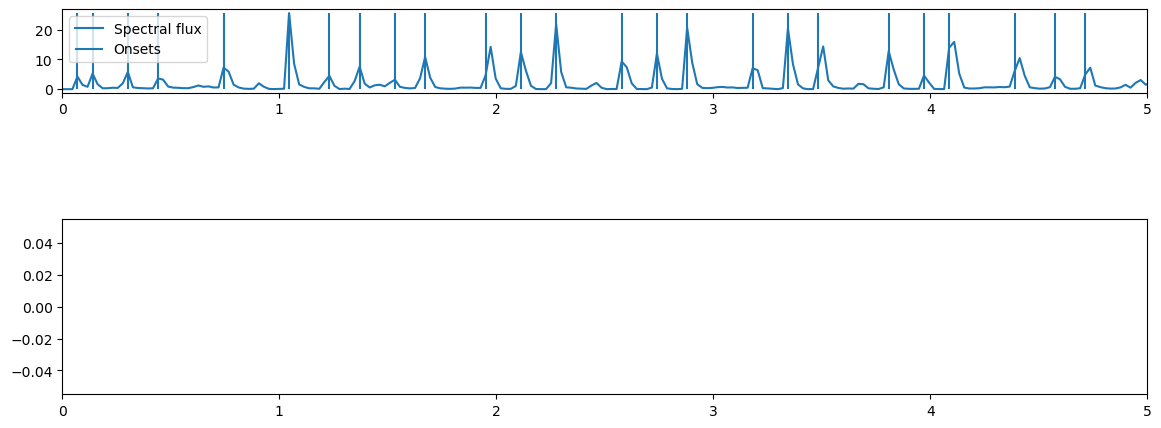

In [30]:
ax = plt.subplot(2, 1, 2)
plt.xlim([0, 5.0])
plt.axis('tight')

plt.subplot(4, 1, 1, sharex=ax)
plt.plot(frame_time, odf_default, label='Spectral flux')
plt.vlines(onset_default, 0, odf_default.max(), label='Onsets')
plt.legend()

In [31]:
odf_default.reshape(1,odf_default.shape[0]).shape

(1, 1292)

## 4.Extract spectral flatness

(1, 1292)

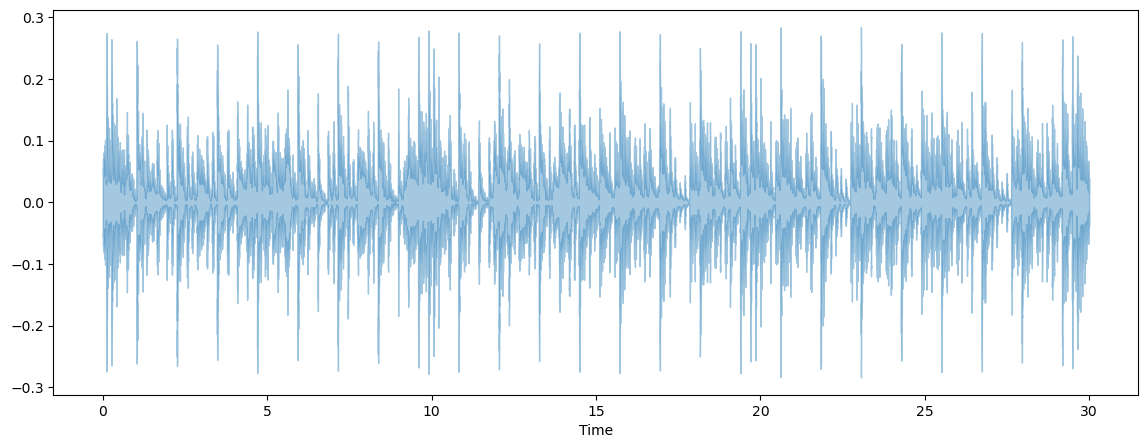

In [34]:
spectral_flatness = librosa.feature.spectral_flatness(y=x)[0]
librosa.display.waveshow(x, sr=sr, alpha=0.4)
spectral_flatness.reshape(1,spectral_flatness.shape[0]).shape

## //Extract spectral contrast

In [35]:
S = np.abs(librosa.stft(x))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

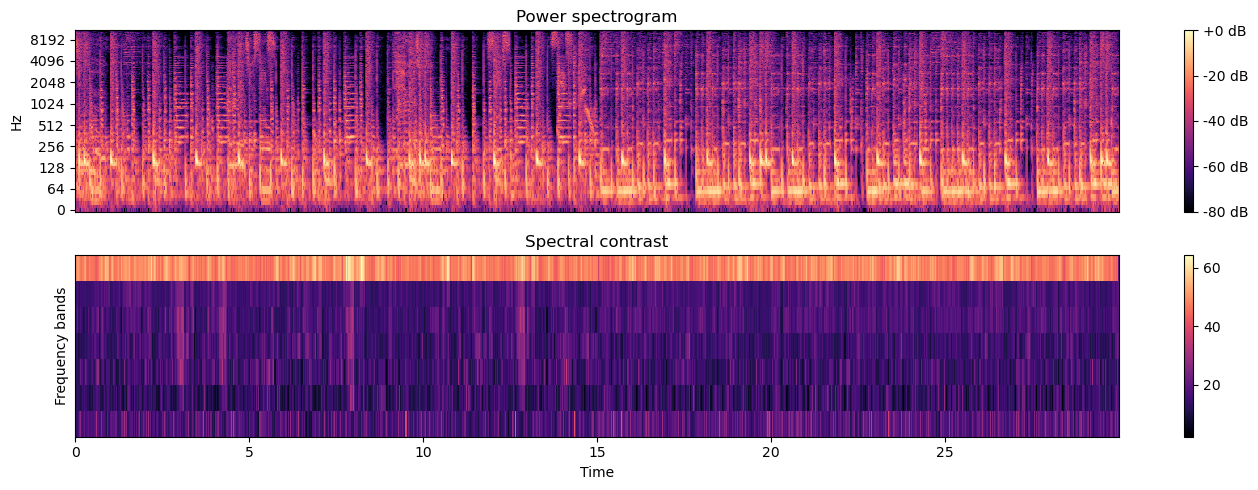

In [36]:
plt.figure()
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Power spectrogram')
plt.subplot(2, 1, 2)
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')
plt.tight_layout()

In [37]:
contrast.shape

(7, 1292)

# MFCC

## Extract melspectogram

In [38]:
mfcc_features_nb = 20

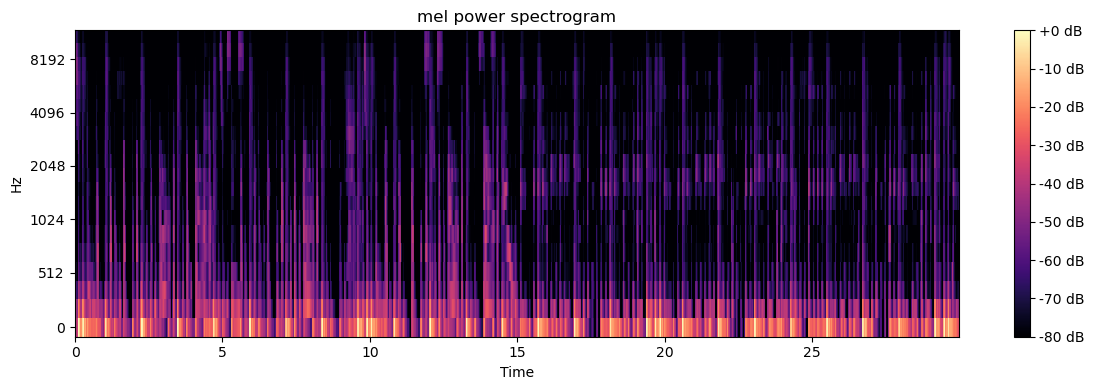

In [39]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=mfcc_features_nb)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.amplitude_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

Text(0.5, 1.0, 'MFCC')

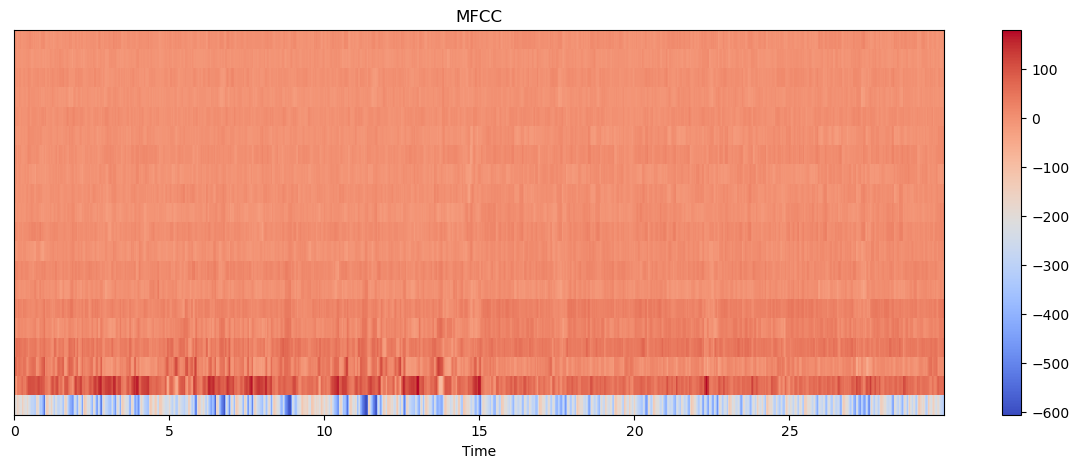

In [40]:
mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=mfcc_features_nb)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')

In [41]:
mfccs.shape

(20, 1292)

# Chromagram

## 6.Extract chromagram

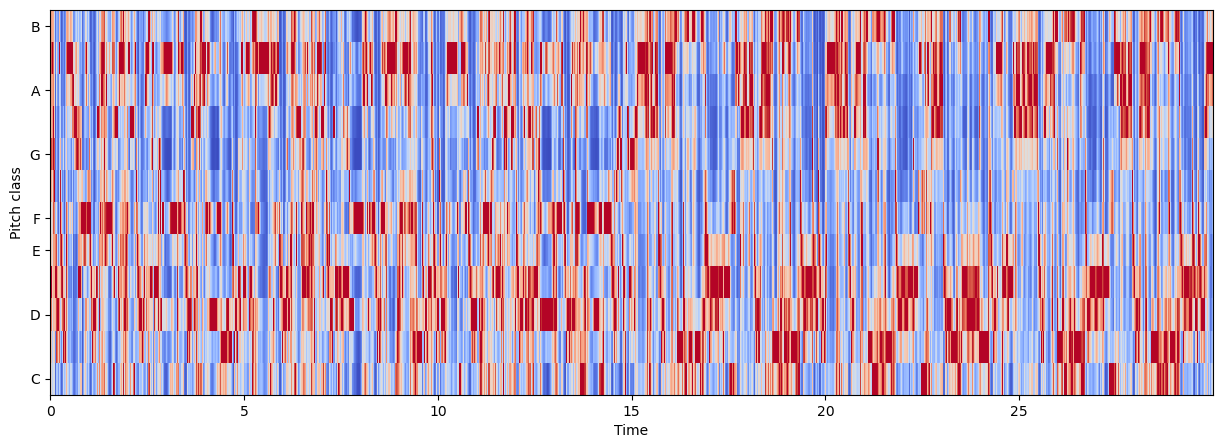

In [42]:
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [43]:
chromagram.shape

(12, 1292)

# OCS

## 7.Extract octave-based spectral contrast

Text(0.5, 1.0, 'Spectral contrast')

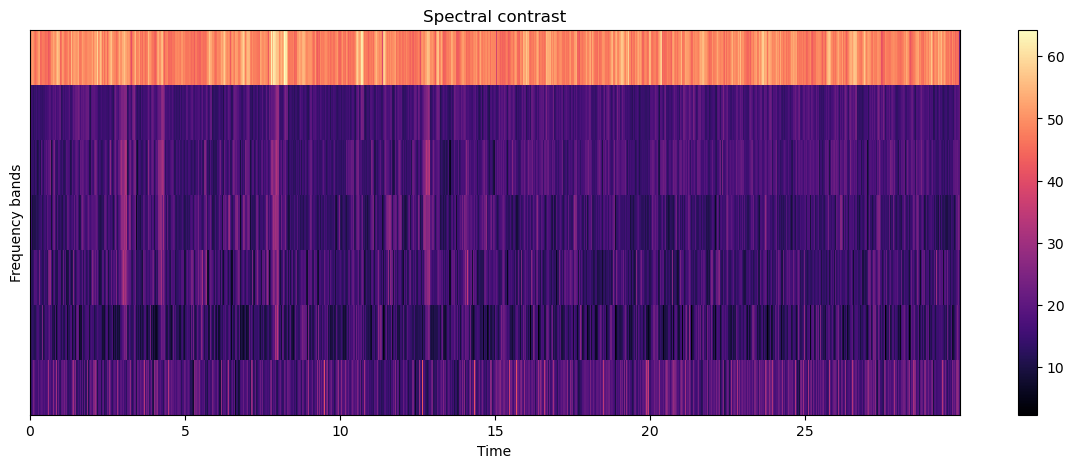

In [44]:
contrast=librosa.feature.spectral_contrast(y=x,sr=sr)
plt.figure(figsize=(15,5))
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')

In [45]:
contrast

array([[ 7.15346278, 21.33768453, 13.31407177, ..., 27.41614629,
        25.54857066, 17.13216113],
       [ 8.41609334,  7.60401711, 12.47653451, ..., 23.98507698,
        19.57549389, 16.15871852],
       [ 8.7787698 , 14.75311454, 13.10029447, ..., 18.34299916,
        21.87010316, 13.96128209],
       ...,
       [13.30165533, 17.85453662, 15.50791308, ..., 21.07637707,
        19.00901293, 19.45520299],
       [16.80577758, 16.19993815, 15.77345401, ..., 17.72367012,
        18.31508444, 20.62801948],
       [18.66979735, 25.40203504, 49.51654172, ..., 45.75457734,
        44.58642982, 21.90906429]])

## Extract 4 sharpness features

In [46]:
import timbral_models
fname = '../database/songs/ML2.mp3'
sharpness = timbral_models.timbral_sharpness(fname)
roughness = timbral_models.timbral_roughness(fname)
brightness = timbral_models.timbral_brightness(fname)
booming = timbral_models.timbral_booming(fname)

## Extract skewness and kurtosis

In [47]:
freqs = np.fft.fftfreq(x.size)
skew = scipy.stats.skew(freqs)
kurt = scipy.stats.kurtosis(freqs)

# Feature generation

In [48]:
def generate_mean_std_skew(data):
    mean=np.mean(data)
    std=np.std(data)
    skew=scipy.stats.skew(data,axis=0)
    return mean, std, skew

In [49]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [50]:
collist_centroids=['cent_mean','cent_std','cent_skew']
collist_rolloff=['rolloff_mean','rolloff_std','rolloff_skew']
collist_flux = ['flux_mean','flux_std','flux_skew']
collist_flatness=['flatness_mean','flatness_std','flatness_skew']
all_spect_columns = collist_centroids+collist_rolloff+collist_flux+collist_flatness

## Spectral centroid, rolloff, flux, flatness

In [51]:
spectral_dict = {}
features = [spectral_centroids, spectral_rolloff, spectral_flux, spectral_flatness]
j=0
for feature in features:
    mss = generate_mean_std_skew(feature)
    for i in range(0,3):
        spectral_dict[all_spect_columns[i+j]] = [mss[i]]
    j += 3
spectral_df = pd.DataFrame(data=spectral_dict)
spectral_df

,cent_mean,cent_std,cent_skew,rolloff_mean,rolloff_std,rolloff_skew,flux_mean,flux_std,flux_skew,flatness_mean,flatness_std,flatness_skew
0,2638.49368,1100.069879,1.324673,5719.965412,1837.37853,-0.615589,2.243598,3.757568,2.72258,0.025201,0.030491,2.3848


## MFCC

In [54]:
mfccs_mean=np.mean(mfccs,axis=1)
mfccs_std=np.std(mfccs,axis=1)
mfccs_df=pd.DataFrame()
for i in range(0,mfcc_features_nb):
    mfccs_df['mfccs_mean_'+str(i)]=mfccs_mean[i]
for i in range(0,mfcc_features_nb):
    mfccs_df['mfccs_std_'+str(i)]=mfccs_std[i]
    
mfccs_df.loc[0]=np.concatenate((mfccs_mean,mfccs_std),axis=0)
mfccs_df

,mfccs_mean_0,mfccs_mean_1,mfccs_mean_2,mfccs_mean_3,mfccs_mean_4,mfccs_mean_5,mfccs_mean_6,mfccs_mean_7,mfccs_mean_8,mfccs_mean_9,...,mfccs_std_10,mfccs_std_11,mfccs_std_12,mfccs_std_13,mfccs_std_14,mfccs_std_15,mfccs_std_16,mfccs_std_17,mfccs_std_18,mfccs_std_19
0,-268.260681,69.758087,19.267004,37.868462,16.588995,23.752098,0.480497,11.043295,1.429243,7.946462,...,8.760078,7.257665,7.827906,7.77809,7.539403,5.751641,5.900208,6.334049,5.222611,6.288249


## OCS

In [59]:
contrast_mean=np.mean(contrast,axis=1)
contrast_std=np.std(contrast,axis=1)
collist = []
ocs_df=pd.DataFrame()

for i in range(0,7):
    collist.append('contrast_mean_'+str(i))
for i in range(0,7):
    collist.append('contrast_std_'+str(i))
    
for c in collist:
    ocs_df[c]=0
    
data=np.concatenate((contrast_mean,contrast_std),axis=0)
ocs_df.loc[0]=data
ocs_df

,contrast_mean_0,contrast_mean_1,contrast_mean_2,contrast_mean_3,contrast_mean_4,contrast_mean_5,contrast_mean_6,contrast_std_0,contrast_std_1,contrast_std_2,contrast_std_3,contrast_std_4,contrast_std_5,contrast_std_6
0,18.673114,13.946976,15.810412,15.918003,17.054915,16.750856,48.870744,4.758903,4.368116,4.294636,4.194616,3.776187,2.994087,3.722513


## Chromagram

In [56]:
chroma_mean=np.mean(chromagram,axis=1)
chroma_std=np.std(chromagram,axis=1)

chroma_df=pd.DataFrame()
for i in range(0,12):
    chroma_df['chroma_mean_'+str(i)]=chroma_mean[i]
for i in range(0,12):
    chroma_df['chroma_std_'+str(i)]=chroma_std[i]
chroma_df.loc[0]=np.concatenate((chroma_mean,chroma_std),axis=0)

chroma_df

,chroma_mean_0,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,chroma_mean_6,chroma_mean_7,chroma_mean_8,chroma_mean_9,...,chroma_std_2,chroma_std_3,chroma_std_4,chroma_std_5,chroma_std_6,chroma_std_7,chroma_std_8,chroma_std_9,chroma_std_10,chroma_std_11
0,0.48451,0.53513,0.608634,0.562189,0.479263,0.478632,0.357683,0.37088,0.439196,0.457731,...,0.2756,0.306878,0.25768,0.291825,0.226776,0.246641,0.301814,0.294989,0.331878,0.282114


# Join features

In [62]:
all_features = [spectral_df, mfccs_df, ocs_df, chroma_df]

final_df=pd.concat(all_features,axis=1)

final_df

,cent_mean,cent_std,cent_skew,rolloff_mean,rolloff_std,rolloff_skew,flux_mean,flux_std,flux_skew,flatness_mean,...,chroma_std_2,chroma_std_3,chroma_std_4,chroma_std_5,chroma_std_6,chroma_std_7,chroma_std_8,chroma_std_9,chroma_std_10,chroma_std_11
0,2638.49368,1100.069879,1.324673,5719.965412,1837.37853,-0.615589,2.243598,3.757568,2.72258,0.025201,...,0.2756,0.306878,0.25768,0.291825,0.226776,0.246641,0.301814,0.294989,0.331878,0.282114
